In [121]:
import pandas as pd
from utils import remove_limiters
from IPython.core.interactiveshell import InteractiveShell

test = remove_limiters()

InteractiveShell.ast_node_interactivity = "all"
data = pd.read_csv("beer/recipeData.csv", encoding = "ISO-8859-1")

# test

Setting limiters to none


In [122]:
data.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-extract,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-all-grain,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgisk-blonde-50-l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


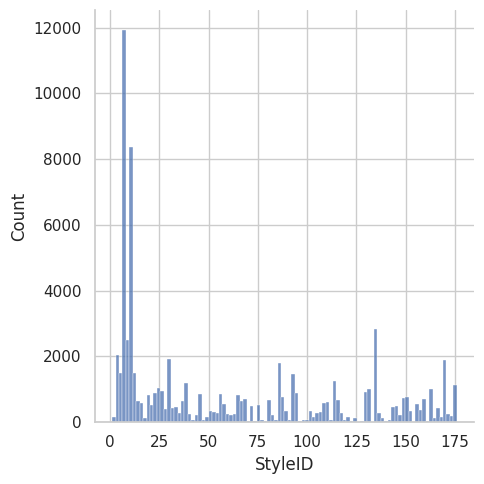

In [123]:
import seaborn as sns

sns.displot(data['StyleID'], bins=100)

Escolhendo os estilos de preparo
================================

Como na base de dados existem estilos de preparo que aparecem poucas vezes (como pode ser visto na tabela acima), nessa versão serão utilizado para a previsão apenas os estilos que aparecem 1000 ou mais vezes na base de dados.


In [124]:
value_counts = data['StyleID'].value_counts()
filtered_count = value_counts[value_counts > 1000]
filtered_data = data[data['StyleID'].isin(filtered_count.index)]

In [125]:
filtered_data.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-extract,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-all-grain,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale-ale-clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN,NaN,NaN,5889.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-pliny-the-elder-original-,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
9,10,Mango Habanero IPA,/homebrew/recipe/view/61082/mango-habanero-ipa,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C,NaN


In [126]:
filtered_data.isna().sum()/len(filtered_data)

BeerID           0.000000
Name             0.000028
URL              0.000000
Style            0.000000
StyleID          0.000000
Size(L)          0.000000
OG               0.000000
FG               0.000000
ABV              0.000000
IBU              0.000000
Color            0.000000
BoilSize         0.000000
BoilTime         0.000000
BoilGravity      0.036698
Efficiency       0.000000
MashThickness    0.409186
SugarScale       0.000000
BrewMethod       0.000000
PitchRate        0.551857
PrimaryTemp      0.318005
PrimingMethod    0.918417
PrimingAmount    0.941988
UserId           0.693202
dtype: float64

Pré-processamento da base de dados
==================================

In [127]:
# Na coluna "BoilGravity", os valores que contém Nan serão retirados, pois não aparecem em quantidade significativa.
filtered_data = filtered_data[filtered_data["BoilGravity"].notnull()]

As colunas 'OG' (Original gravity, ou densidade original da cerveja), 'FG' (Final gravity, ou densidade final da cerveja), 'Size(L)' (quantidade fermentada para a receita) serão retiradas da base de dados final, pois a maioria dos dados dessas colunas são um valor único (como pode ser visto pelos gráficos de distribuição acima).  
A colunas 'UserId','BeerId','URL','Style' serão removidas pois não são consideradas relevantes para o objetivo do projeto.

In [128]:
filtered_data = filtered_data.drop(columns=["URL","Style","OG","FG","Size(L)","UserId","Name","BoilSize","BeerID","SugarScale"],axis=1)

In [129]:
filtered_data = filtered_data.drop(columns=["PrimingMethod","PrimingAmount"],axis=1)

Para a variável categórica 'BrewMethod', será utilizado o one-hot encoding

In [130]:
from utils import one_hot
concat_data = one_hot(filtered_data,'BrewMethod')

In [131]:
concat_data.head()

,StyleID,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
5,10,5.58,40.12,8.00,70,1.047,79.0,NaN,1.00,NaN,1,0,0,0
9,86,8.22,93.02,8.29,60,1.058,70.0,NaN,NaN,21.11,1,0,0,0
10,7,6.63,64.26,7.78,90,1.055,74.0,NaN,1.00,18.00,1,0,0,0
13,7,6.51,60.96,10.54,60,1.110,30.0,NaN,0.35,18.33,0,0,0,1
14,7,6.20,64.67,3.91,60,1.071,70.0,1.2,NaN,NaN,1,0,0,0


Hipótese
========

1. Se a variável "BoilTime" for alterada, a variável "Color" também será (ou seja, as duas variáveis são correlacionadas)

<AxesSubplot:xlabel='Color', ylabel='BoilTime'>

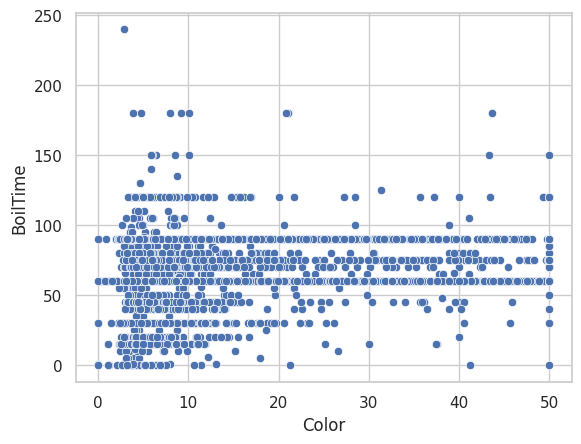

In [132]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.scatterplot(x=concat_data["Color"],y=concat_data["BoilTime"])

Conclusão
---------

Como pode ser visto no gráfico, quando a variável "BoilTime" assume valores pequenos, a cor da cerveja raramente assume valores maiores que 20, enquanto que valores de "BoilTime" entre 50 e 100 

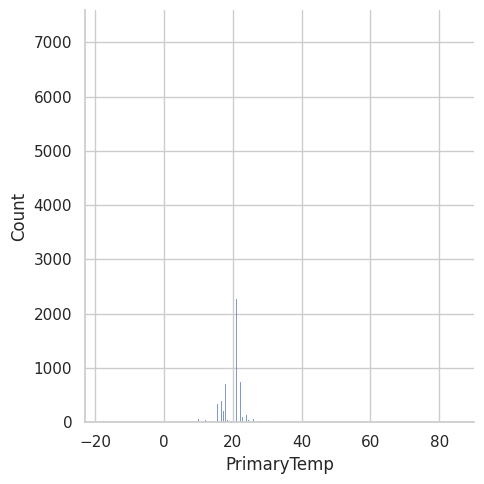

In [133]:
sns.displot(concat_data['PrimaryTemp'])

In [134]:
concat_data['PrimaryTemp'] = concat_data['PrimaryTemp'].fillna(value=concat_data['PrimaryTemp'].median())


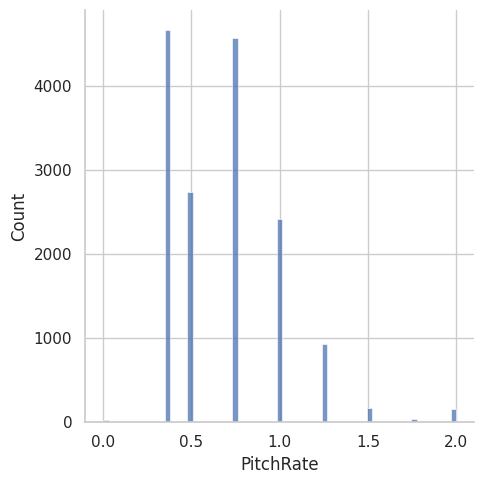

In [135]:
sns.displot(concat_data['PitchRate'])

In [136]:
concat_data['PitchRate'] = concat_data['PitchRate'].fillna(value=concat_data['PitchRate'].mean())
concat_data['MashThickness'] = concat_data['MashThickness'].fillna(value=concat_data['MashThickness'].mean())

In [137]:
concat_data.isna().sum()/len(concat_data)

StyleID          0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64

In [138]:
concat_data.head()

,StyleID,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
5,10,5.58,40.12,8.00,70,1.047,79.0,2.123635,1.000000,20.00,1,0,0,0
9,86,8.22,93.02,8.29,60,1.058,70.0,2.123635,0.677688,21.11,1,0,0,0
10,7,6.63,64.26,7.78,90,1.055,74.0,2.123635,1.000000,18.00,1,0,0,0
13,7,6.51,60.96,10.54,60,1.110,30.0,2.123635,0.350000,18.33,0,0,0,1
14,7,6.20,64.67,3.91,60,1.071,70.0,1.200000,0.677688,20.00,1,0,0,0


In [139]:
y = concat_data['StyleID']
x = concat_data.drop(columns=['StyleID'])

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

decisionTree = DecisionTreeClassifier()

criterion = [ 'gini', 'entropy']
max_depth = np.array([2,3,5,7,11,13])
min_samples_split = np.array([10,11,12,13,14,15,16,17,18,19,20])

params = { 'criterion': criterion, 'max_depth': max_depth, 'min_samples_split':min_samples_split }
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

randomizedSearchResult = RandomizedSearchCV(estimator= decisionTree, param_distributions=params, cv=stratifiedKfold)
gridSearchResult = GridSearchCV(estimator= decisionTree, param_grid=params, cv=stratifiedKfold)

randomizedSearchResult.fit(x,y)
gridSearchResult.fit(x,y)

print(gridSearchResult.best_score_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  5,  7, 11, 13]),
                                        'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])})

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  5,  7, 11, 13]),
                         'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])})

0.5930136815119231
